In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [23]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .3                  # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    

ym0_bar= np.zeros((N,4))
for i in range(len(ym0_bar)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0_bar[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT
p[-5]= -1

In [24]:
bigy= der.newarray_maker(ym0, ym0_bar)

In [25]:
y0, y0_bar= der.newmatrix_maker(bigy)

In [26]:
print(bigy.shape, y0.shape, y0_bar.shape)

(800,) (100, 4) (100, 4)


In [27]:
initial= der.dndE(y0, Eval)
initial_bar= der.dndE(y0_bar, Eval)

In [28]:
print(Eval.shape, initial.shape, initial_bar.shape)

(100,) (100,) (100,)


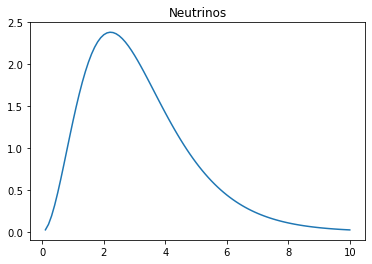

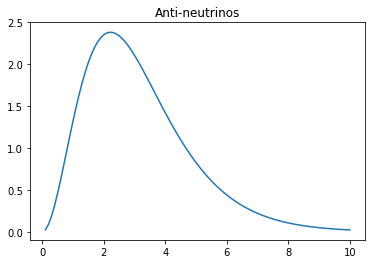

In [29]:
plt.figure()
plt.plot(Eval, initial)
plt.title("Neutrinos")
plt.show()

plt.figure()
plt.plot(Eval, initial_bar)
plt.title("Anti-neutrinos")
plt.show()

In [30]:
y0= der.newarray_maker(ym0, np.zeros((N,4)))
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

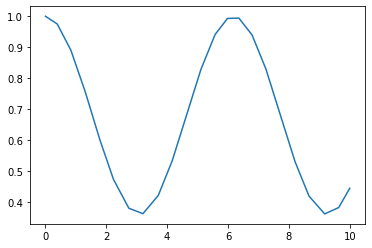

In [31]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

In [32]:
y0= der.newarray_maker(np.zeros((N,4)), ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

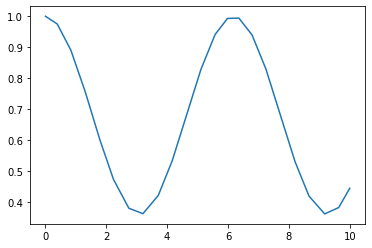

In [33]:
probability= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

In [37]:
y0= der.newarray_maker(ym0, ym0_bar)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(t0,y0,p)))
N_step = 100              
dN = 10
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

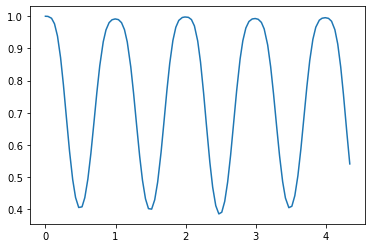

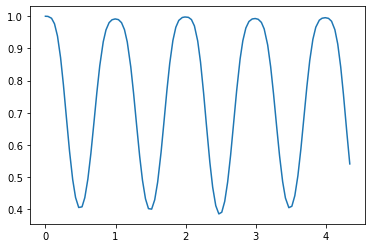

In [38]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

probability_bar= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability)
plt.show()

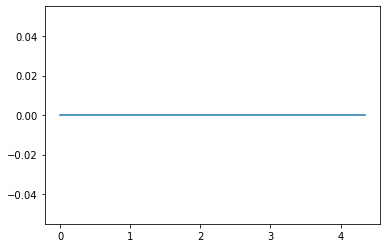

In [39]:
plt.figure()
plt.plot(t * dm2/(2*2.2*T), probability - probability_bar)
plt.show()

In [7]:
def f(x,y,p):
    if (p[-5] != -1):
        T= p[-3]
        cT= p[-4]
        ym= matrix_maker(y)
        N= ym.shape[0]
        energy= p[:N]*T
        derm= np.zeros(ym.shape)
        Vvv= Vvv_function(ym, energy)
        VT= VT_function(ym, energy, T)
        for i in range(derm.shape[0]):
               derm[i,:]= vacuum(ym[i,:], energy[i], p[-1], p[-2]) + cross_product(ym[i,:], Vvv) + cT*cross_product(ym[i,:], energy[i]*VT)
    
        return array_maker(derm)
    
    else:
        T= p[-3]
        cT= p[-4]
        ym, ym_bar= newmatrix_maker(y)
        N= ym.shape[0]
        energy= p[:N]*T
        derm= np.zeros(ym.shape)
        derm_bar= np.zeros(ym_bar.shape)
        Vvv_Vvvbar= Vvv_function(ym, energy) - Vvv_function(ym_bar, energy)
        VT= VT_function(ym, energy, T)
        for i in range(derm.shape[0]):
            derm[i,:]= vacuum(ym[i,:], energy[i], p[-1], p[-2]) + cross_product(ym[i,:], Vvv_Vvvbar) + cT*cross_product(ym[i,:], energy[i]*VT)
            derm_bar[i,:]= -vacuum(ym_bar[i,:], energy[i], p[-1], p[-2]) + cross_product(ym_bar[i,:], Vvv_Vvvbar) - cT*cross_product(ym_bar[i,:], energy[i]*VT)
        return newarray_maker(derm, derm_bar)

In [9]:
t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODEslow.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

In [10]:
y0= der.newarray_maker(ym0, np.zeros((N, 4)))

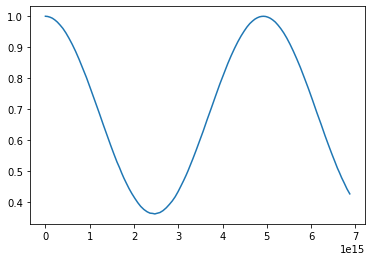

In [11]:
probability= der.probability(ym0, Eval, t, y[:, :4*N])

plt.figure()
plt.plot(t, probability)
plt.show()

In [12]:
y0= der.newarray_maker(np.zeros((N,4)), ym0_bar)

In [13]:
t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODEslow.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)





probability2= der.probability(ym0_bar, Eval, t, y[:, 4*N:])

plt.figure()
plt.plot(t, probability2)
plt.show()

ValueError: operands could not be broadcast together with shapes (99,) (0,) 